In [5]:

import glob
import pandas as pd


csv_files = glob.glob('/home/micro2/Desktop/bdvc/*.csv')


dfs = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)
#diis_index = df[df['Promoter'] == 'Government'].index
diis_index = df[df['Promoter'] == 'FIIs'].index
promter_index = df[df['Promoter'] == 'Promoters'].index


drop_indices = []


for start in diis_index:

    end_candidates = promter_index[promter_index > start]
    if not end_candidates.empty:
        end = end_candidates[0]
        drop_indices.extend(range(start + 1, end))


df.drop(drop_indices, inplace=True)
df.reset_index(drop=True, inplace=True)


diis_index = df[df['Promoter'] == 'DIIs'].index
promter_index = df[df['Promoter'] == 'Promoters'].index


drop_indices = []


for start in diis_index:

    end_candidates = promter_index[promter_index > start]
    if not end_candidates.empty:
        end = end_candidates[0]
        drop_indices.extend(range(start + 1, end))


df.drop(drop_indices, inplace=True)
df = df[df['Promoter'] != "FIIs"] 
df = df[df['Promoter'] != "DIIs"] 
df = df[df['Promoter'] != "Public"] 
df = df[df['Promoter'] != "Government"] 
df = df[df['Promoter'] != "Others"]
df = df[df['Promoter'] != "Promoters"]
df.reset_index(drop=True, inplace=True)

#top_promoters = df['Promoter'].value_counts().head(10).index
#top_promoters =top_promoters.drop("Promoters")
#top_promoter_df = df[df['Promoter'].isin(top_promoters)]


In [9]:
du = df

In [10]:
du["Share_Change"] = du.groupby("Promoter")["Share"].transform(lambda x: x.pct_change() * 100)


In [6]:
a =du[du["BSE Code"]==540900]

In [4]:
du

,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date,Share_Cha0nge
0,Diwakar Nigam,22.41,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
1,T S Varadarajan,21.46,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
2,Priyadarshini Nigam,9.39,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
3,Usha Varadarajan,1.90,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
4,Ragini Goorha,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
...,...,...,...,...,...,...,...,...,...,...
481019,SBI General Insurance Company Limited,0.00,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN
481020,Icici Prudential MultiAsset Fund,5.37,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN
481021,Life Insurance Corporation Of India P Gs Fund,5.96,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN
481022,Mirae Asset Large Cap Fund,1.11,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN


In [7]:
a

,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date,Share_Cha0nge
0,Diwakar Nigam,22.41,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
1,T S Varadarajan,21.46,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
2,Priyadarshini Nigam,9.39,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
3,Usha Varadarajan,1.90,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
4,Ragini Goorha,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN
...,...,...,...,...,...,...,...,...,...,...
256,Sudha Sairaj,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Jun 2024,01-06-2024,NaN
257,Krios Technologies Private Limited,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Jun 2024,01-06-2024,NaN
258,Jnanaadri Technovations Private Limited,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Jun 2024,01-06-2024,NaN
259,Sosaley Technologies Private Limited,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Jun 2024,01-06-2024,NaN


In [34]:
a =du[du["Promoter"]=="T S Varadarajan"]

In [35]:
a

Promoter  Share  BSE Code NSE Code   Price  \
Promoter                                                                 
T S Varadarajan 1    T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                22   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                44   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                66   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                88   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                110  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                132  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                154  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                176  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                198  T S Varadarajan  21.42    540900   NEWGEN  1074.0   
                220  T S Varadarajan  21.40    540900   NEWGEN  1074.0   
                241  T S Varadarajan  21.40    540900   NEWGEN  1074.0   

                             MCap   TotalShares CaptureDate        Date  \
Promoter                                                                  
T S Varadarajan 1    1.507000e+11  1.403166e+08    Sep 2021  01-09-2021   
                22   1.507000e+11  1.403166e+08    Dec 2021  01-12-2021   
                44   1.507000e+11  1.403166e+08    Mar 2022  01-03-2022   
                66   1.507000e+11  1.403166e+08    Jun 2022  01-06-2022   
                88   1.507000e+11  1.403166e+08    Sep 2022  01-09-2022   
                110  1.507000e+11  1.403166e+08    Dec 2022  01-12-2022   
                132  1.507000e+11  1.403166e+08    Mar 2023  01-03-2023   
                154  1.507000e+11  1.403166e+08    Jun 2023  01-06-2023   
                176  1.507000e+11  1.403166e+08    Sep 2023  01-09-2023   
                198  1.507000e+11  1.403166e+08    Dec 2023  01-12-2023   
                220  1.507000e+11  1.403166e+08    Mar 2024  01-03-2024   
                241  1.507000e+11  1.403166e+08    Jun 2024  01-06-2024   

                     Share_Cha0nge     ch  
Promoter                                   
T S Varadarajan 1              NaN  EQUAL  
                22        0.000000  EQUAL  
                44        0.000000  EQUAL  
                66        0.000000  EQUAL  
                88        0.000000  EQUAL  
                110       0.000000  EQUAL  
                132       0.000000  EQUAL  
                154       0.000000  EQUAL  
                176       0.000000  EQUAL  
                198      -0.186393   Down  
                220      -0.093371   Down  
                241       0.000000  EQUAL

In [20]:
import pandas as pd



du['ch'] = ''  

def compare_shares(group):
    return pd.Series([''] + ['Up' if x > y else 'Down' if x < y else 'Equal' for x, y in zip(group['Share'], group['Share'][1:])])

du['ch'] = du.groupby('Promoter').transform(compare_shares)


KeyError: 'Share'

In [11]:
du

,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date,Share_Cha0nge,ch
0,Diwakar Nigam,22.41,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN,
1,T S Varadarajan,21.46,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN,
2,Priyadarshini Nigam,9.39,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN,
3,Usha Varadarajan,1.90,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN,
4,Ragini Goorha,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
481019,SBI General Insurance Company Limited,0.00,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN,
481020,Icici Prudential MultiAsset Fund,5.37,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN,
481021,Life Insurance Corporation Of India P Gs Fund,5.96,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN,
481022,Mirae Asset Large Cap Fund,1.11,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024,NaN,


In [4]:
import glob
import pandas as pd


csv_files = glob.glob('/home/zxc/rag/e/*.csv')


dfs = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)
#diis_index = df[df['Promoter'] == 'Government'].index
diis_index = df[df['Promoter'] == 'FIIs'].index
promter_index = df[df['Promoter'] == 'Promoters'].index


drop_indices = []


for start in diis_index:

    end_candidates = promter_index[promter_index > start]
    if not end_candidates.empty:
        end = end_candidates[0]
        drop_indices.extend(range(start + 1, end))


df.drop(drop_indices, inplace=True)
df.reset_index(drop=True, inplace=True)


diis_index = df[df['Promoter'] == 'DIIs'].index
promter_index = df[df['Promoter'] == 'Promoters'].index


drop_indices = []


for start in diis_index:

    end_candidates = promter_index[promter_index > start]
    if not end_candidates.empty:
        end = end_candidates[0]
        drop_indices.extend(range(start + 1, end))


df.drop(drop_indices, inplace=True)
df = df[df['Promoter'] != "FIIs"] 
df = df[df['Promoter'] != "DIIs"] 
df = df[df['Promoter'] != "Public"] 
df = df[df['Promoter'] != "Government"] 
df = df[df['Promoter'] != "Others"]
df = df[df['Promoter'] != "Promoters"]
df.reset_index(drop=True, inplace=True)

du = df
du["Share_Change"] = du.groupby("Promoter")["Share"].transform(lambda x: x.pct_change() * 100)
du["ch"] = ""


def label_change(group):
    group['ch'] = group['Share'].diff().apply(lambda x: "UP" if x > 0 else ("Down" if x < 0 else "EQUAL"))
    return group


du = du.groupby("Promoter").apply(label_change)
du.to_csv("tt6.csv")



ValueError: No objects to concatenate

In [11]:
du["ch"] = ""


def label_change(group):
    group['ch'] = group['Share'].diff().apply(lambda x: "UP" if x > 0 else ("Down" if x < 0 else "EQUAL"))
    return group


du = du.groupby("Promoter").apply(label_change)


<ipython-input-11-77703b4c46fb>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  du = du.groupby("Promoter").apply(label_change)


In [14]:
du

Promoter  \
Promoter                                                                    
20Th Century Engineering Limited 43987   20Th Century Engineering Limited   
                                 44010   20Th Century Engineering Limited   
                                 44034   20Th Century Engineering Limited   
                                 44058   20Th Century Engineering Limited   
                                 44080   20Th Century Engineering Limited   
...                                                                   ...   
xxxii S Sridhar HUF              329580               xxxii S Sridhar HUF   
                                 329614               xxxii S Sridhar HUF   
                                 329652               xxxii S Sridhar HUF   
                                 329690               xxxii S Sridhar HUF   
                                 329729               xxxii S Sridhar HUF   

                                         Share  BSE Code    NSE Code  Price  \
Promoter                                                                      
20Th Century Engineering Limited 43987    2.73    500402   SPMLINFRA  245.0   
                                 44010    2.73    500402   SPMLINFRA  245.0   
                                 44034    2.54    500402   SPMLINFRA  245.0   
                                 44058    2.34    500402   SPMLINFRA  245.0   
                                 44080    2.20    500402   SPMLINFRA  245.0   
...                                        ...       ...         ...    ...   
xxxii S Sridhar HUF              329580   0.00    500412  TIRUMALCHM  340.0   
                                 329614   0.00    500412  TIRUMALCHM  340.0   
                                 329652   0.00    500412  TIRUMALCHM  340.0   
                                 329690   0.00    500412  TIRUMALCHM  340.0   
                                 329729   0.00    500412  TIRUMALCHM  340.0   

                                                 MCap   TotalShares  \
Promoter                                                              
20Th Century Engineering Limited 43987   1.467000e+10  5.987755e+07   
                                 44010   1.467000e+10  5.987755e+07   
                                 44034   1.467000e+10  5.987755e+07   
                                 44058   1.467000e+10  5.987755e+07   
                                 44080   1.467000e+10  5.987755e+07   
...                                               ...           ...   
xxxii S Sridhar HUF              329580  3.476000e+10  1.022353e+08   
                                 329614  3.476000e+10  1.022353e+08   
                                 329652  3.476000e+10  1.022353e+08   
                                 329690  3.476000e+10  1.022353e+08   
                                 329729  3.476000e+10  1.022353e+08   

                                        CaptureDate        Date  \
Promoter                                                          
20Th Century Engineering Limited 43987     Sep 2021  01-09-2021   
                                 44010     Dec 2021  01-12-2021   
                                 44034     Mar 2022  01-03-2022   
                                 44058     Jun 2022  01-06-2022   
                                 44080     Sep 2022  01-09-2022   
...                                             ...         ...   
xxxii S Sridhar HUF              329580    Jun 2022  01-06-2022   
                                 329614    Sep 2022  01-09-2022   
                                 329652    Dec 2022  01-12-2022   
                                 329690    Mar 2023  01-03-2023   
                                 329729    Jun 2023  01-06-2023   

                                         Share_Cha0nge     ch  
Promoter                                                       
20Th Century Engineering Limited 43987             NaN  EQUAL  
                                 44010        0

In [41]:
a['Share_Cha0nge'].diff()

Promoter            
T S Varadarajan  1           NaN
                 22          NaN
                 44     0.000000
                 66     0.000000
                 88     0.000000
                 110    0.000000
                 132    0.000000
                 154    0.000000
                 176    0.000000
                 198   -0.186393
                 220    0.093023
                 241    0.093371
Name: Share_Cha0nge, dtype: float64

In [37]:
a

Promoter  Share  BSE Code NSE Code   Price  \
Promoter                                                                 
T S Varadarajan 1    T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                22   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                44   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                66   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                88   T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                110  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                132  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                154  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                176  T S Varadarajan  21.46    540900   NEWGEN  1074.0   
                198  T S Varadarajan  21.42    540900   NEWGEN  1074.0   
                220  T S Varadarajan  21.40    540900   NEWGEN  1074.0   
                241  T S Varadarajan  21.40    540900   NEWGEN  1074.0   

                             MCap   TotalShares CaptureDate        Date  \
Promoter                                                                  
T S Varadarajan 1    1.507000e+11  1.403166e+08    Sep 2021  01-09-2021   
                22   1.507000e+11  1.403166e+08    Dec 2021  01-12-2021   
                44   1.507000e+11  1.403166e+08    Mar 2022  01-03-2022   
                66   1.507000e+11  1.403166e+08    Jun 2022  01-06-2022   
                88   1.507000e+11  1.403166e+08    Sep 2022  01-09-2022   
                110  1.507000e+11  1.403166e+08    Dec 2022  01-12-2022   
                132  1.507000e+11  1.403166e+08    Mar 2023  01-03-2023   
                154  1.507000e+11  1.403166e+08    Jun 2023  01-06-2023   
                176  1.507000e+11  1.403166e+08    Sep 2023  01-09-2023   
                198  1.507000e+11  1.403166e+08    Dec 2023  01-12-2023   
                220  1.507000e+11  1.403166e+08    Mar 2024  01-03-2024   
                241  1.507000e+11  1.403166e+08    Jun 2024  01-06-2024   

                     Share_Cha0nge    ch  
Promoter                                  
T S Varadarajan 1              NaN   NaN  
                22        0.000000  0.00  
                44        0.000000  0.00  
                66        0.000000  0.00  
                88        0.000000  0.00  
                110       0.000000  0.00  
                132       0.000000  0.00  
                154       0.000000  0.00  
                176       0.000000  0.00  
                198      -0.186393 -0.04  
                220      -0.093371 -0.02  
                241       0.000000  0.00

In [1]:
a = du[du["Date"]=="01-06-2024"]

NameError: name 'du' is not defined

In [42]:
du

Promoter  \
Promoter                                                                    
20Th Century Engineering Limited 43987   20Th Century Engineering Limited   
                                 44010   20Th Century Engineering Limited   
                                 44034   20Th Century Engineering Limited   
                                 44058   20Th Century Engineering Limited   
                                 44080   20Th Century Engineering Limited   
...                                                                   ...   
xxxii S Sridhar HUF              329580               xxxii S Sridhar HUF   
                                 329614               xxxii S Sridhar HUF   
                                 329652               xxxii S Sridhar HUF   
                                 329690               xxxii S Sridhar HUF   
                                 329729               xxxii S Sridhar HUF   

                                         Share  BSE Code    NSE Code  Price  \
Promoter                                                                      
20Th Century Engineering Limited 43987    2.73    500402   SPMLINFRA  245.0   
                                 44010    2.73    500402   SPMLINFRA  245.0   
                                 44034    2.54    500402   SPMLINFRA  245.0   
                                 44058    2.34    500402   SPMLINFRA  245.0   
                                 44080    2.20    500402   SPMLINFRA  245.0   
...                                        ...       ...         ...    ...   
xxxii S Sridhar HUF              329580   0.00    500412  TIRUMALCHM  340.0   
                                 329614   0.00    500412  TIRUMALCHM  340.0   
                                 329652   0.00    500412  TIRUMALCHM  340.0   
                                 329690   0.00    500412  TIRUMALCHM  340.0   
                                 329729   0.00    500412  TIRUMALCHM  340.0   

                                                 MCap   TotalShares  \
Promoter                                                              
20Th Century Engineering Limited 43987   1.467000e+10  5.987755e+07   
                                 44010   1.467000e+10  5.987755e+07   
                                 44034   1.467000e+10  5.987755e+07   
                                 44058   1.467000e+10  5.987755e+07   
                                 44080   1.467000e+10  5.987755e+07   
...                                               ...           ...   
xxxii S Sridhar HUF              329580  3.476000e+10  1.022353e+08   
                                 329614  3.476000e+10  1.022353e+08   
                                 329652  3.476000e+10  1.022353e+08   
                                 329690  3.476000e+10  1.022353e+08   
                                 329729  3.476000e+10  1.022353e+08   

                                        CaptureDate        Date  \
Promoter                                                          
20Th Century Engineering Limited 43987     Sep 2021  01-09-2021   
                                 44010     Dec 2021  01-12-2021   
                                 44034     Mar 2022  01-03-2022   
                                 44058     Jun 2022  01-06-2022   
                                 44080     Sep 2022  01-09-2022   
...                                             ...         ...   
xxxii S Sridhar HUF              329580    Jun 2022  01-06-2022   
                                 329614    Sep 2022  01-09-2022   
                                 329652    Dec 2022  01-12-2022   
                                 329690    Mar 2023  01-03-2023   
                                 329729    Jun 2023  01-06-2023   

                                         Share_Cha0nge     ch  
Promoter                                                       
20Th Century Engineering Limited 43987             NaN  EQUAL  
                                 44010        0

In [49]:
a = a[a["ch"]=="UP"]

In [50]:
a

,,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date,Share_Cha0nge,ch
Promoter,,,,,,,,,,,,
A Durga Sundeep,239521,A Durga Sundeep,3.54,526263,MOLDTECH,223.0,6.370000e+09,2.856502e+07,Jun 2024,01-06-2024,98.876404,UP
APriyamvadha,142157,APriyamvadha,15.85,512634,NaN,157.0,1.870000e+09,1.191083e+07,Jun 2024,01-06-2024,175.173611,UP
Aadhar Infosystems Private Limited,317781,Aadhar Infosystems Private Limited,0.43,520073,NaN,1002.0,1.080000e+10,1.077844e+07,Jun 2024,01-06-2024,4.878049,UP
Aanal Pravin Bhagwati,373800,Aanal Pravin Bhagwati,3.77,504646,NaN,455.0,1.310000e+09,2.879121e+06,Jun 2024,01-06-2024,0.265957,UP
Aarey Drugs And Pharmaceuticals Limited,419931,Aarey Drugs And Pharmaceuticals Limited,2.70,538451,NaN,41.5,6.150000e+09,1.481928e+08,Jun 2024,01-06-2024,inf,UP
...,...,...,...,...,...,...,...,...,...,...,...,...
Yashpal Velchand Jain,301025,Yashpal Velchand Jain,0.08,544200,AFIL,116.0,4.940000e+09,4.258621e+07,Jun 2024,01-06-2024,inf,UP
Yashvardhan Rajgarhia,217266,Yashvardhan Rajgarhia,0.02,526525,NaN,22.1,7.270000e+07,3.289593e+06,Jun 2024,01-06-2024,100.000000,UP
Yashwant Kumar Daga,405476,Yashwant Kumar Daga,13.88,514030,NaN,218.0,1.570000e+09,7.201835e+06,Jun 2024,01-06-2024,0.725689,UP


In [12]:
du.to_csv("tt6.csv")

In [16]:
data = pd.read_csv("gj.csv")

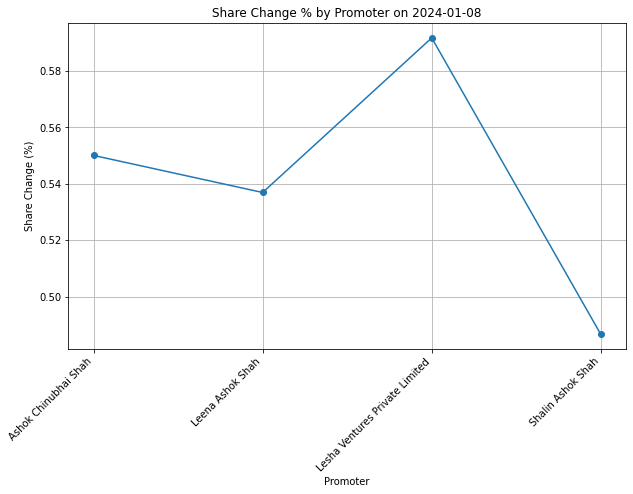

In [18]:
import matplotlib.pyplot as plt
df = pd.DataFrame(data)

# Drop rows where Share_Change% is None
df = df.dropna(subset=['Share_Change%'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Promoter'], df['Share_Change%'], marker='o')

# Adding labels and title
plt.xlabel('Promoter')
plt.ylabel('Share Change (%)')
plt.title('Share Change % by Promoter on 2024-01-08')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [19]:
import plotly.express as px

In [20]:
df = pd.DataFrame(data)

# Drop rows where Share_Change% is None
df = df.dropna(subset=['Share_Change%'])

# Plotting using Plotly Express
fig = px.line(
    df,
    x='Promoter',
    y='Share_Change%',
    title='Share Change % by Promoter on 2024-01-08',
    labels={
        'Promoter': 'Promoter',
        'Share_Change%': 'Share Change (%)'
    },
    markers=True
)

# Customize the layout
fig.update_layout(xaxis_title="Promoter", yaxis_title="Share Change (%)")
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

In [21]:
fig = px.bar(
    df,
    x='Share_Change%',
    y='Promoter',
    orientation='h',
    title='Share Change % by Promoter on 2024-01-08',
    labels={'Share_Change%': 'Share Change (%)'},
    text='Share_Change%'
)

fig.show()


In [22]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Promoter',
    y='Share_Change%',
    size='Share_Change%',
    title='Share Change % by Promoter on 2024-01-08',
    labels={'Share_Change%': 'Share Change (%)'},
    hover_data=['Promoter']
)

fig.update_xaxes(tickangle=45)
fig.show()


In [23]:
fig = px.bar(
    df,
    x='Promoter',
    y='Share_Change%',
    title='Share Change % by Promoter on 2024-01-08',
    labels={'Share_Change%': 'Share Change (%)'},
    text='Share_Change%'
)

fig.update_xaxes(tickangle=45)
fig.show()


In [24]:
fig = px.box(
    df,
    x='Promoter',
    y='Share_Change%',
    title='Distribution of Share Change % by Promoter on 2024-01-08',
    labels={'Share_Change%': 'Share Change (%)'}
)

fig.update_xaxes(tickangle=45)
fig.show()


In [25]:
gt = pd.read_csv("/home/micro2/Documents/2024-09-02T10-32_export.csv")

In [26]:
gt

,Unnamed: 0,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date,Share_Change%,ch
0,31681,Anita Ravichandran,1.98,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
1,62978,Bela Gajra,0.54,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
2,148093,Indira R Gajra,0.10,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
3,152896,J S Gajra,0.01,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
4,181708,Kennedy Ram Gajra,24.97,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,inf,UP
...,...,...,...,...,...,...,...,...,...,...,...,...
127,322983,Ram S Gajra,0.01,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,0.000000,EQUAL
128,370901,Savitri JGajra,0.99,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,-12.389381,Down
129,422694,Suresh R Gajra,0.09,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,-10.000000,Down
130,426496,Swaranjeet Singh Nagpaul,0.03,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,0.000000,EQUAL


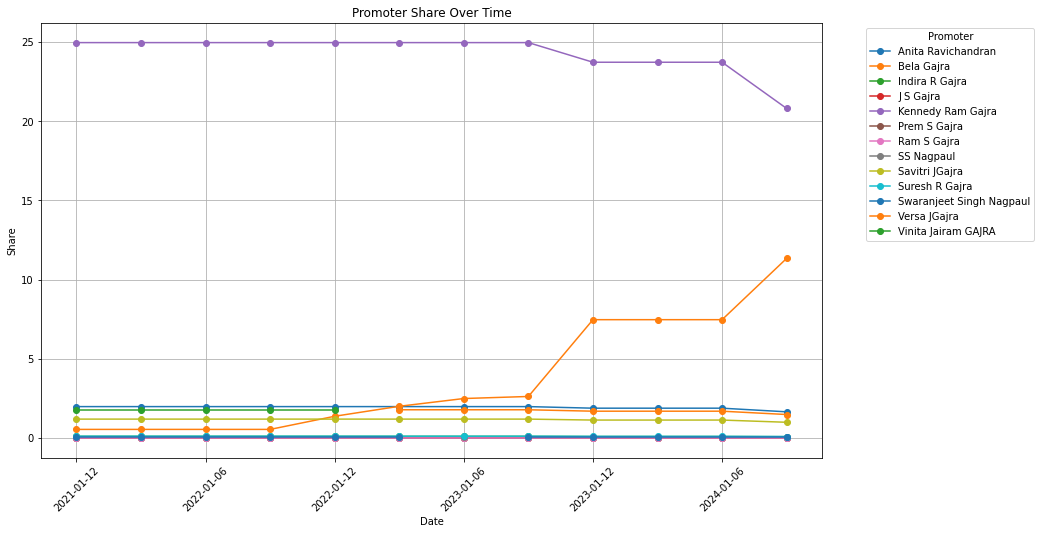

In [27]:
df = pd.DataFrame(gt)


df_pivot = df.pivot(index='Date', columns='Promoter', values='Share')


df_pivot.plot(figsize=(14, 8), marker='o')

plt.title('Promoter Share Over Time')
plt.xlabel('Date')
plt.ylabel('Share')
plt.xticks(rotation=45)
plt.legend(title='Promoter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

In [29]:
import pandas as pd
import plotly.graph_objects as go
df = pd.DataFrame(gt)


df_pivot = df.pivot(index='Date', columns='Promoter', values='Share')


fig = go.Figure()

for promoter in df_pivot.columns:
    fig.add_trace(go.Scatter(
        x=df_pivot.index,
        y=df_pivot[promoter],
        mode='lines+markers',
        name=promoter
    ))

fig.update_layout(
    title='Promoter Share Over Time',
    xaxis_title='Date',
    yaxis_title='Share',
    xaxis=dict(tickangle=-45),
    legend_title='Promoter',
    width=1000,
    height=600
)

fig.show()

In [30]:
gt

,Unnamed: 0,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date,Share_Change%,ch
0,31681,Anita Ravichandran,1.98,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
1,62978,Bela Gajra,0.54,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
2,148093,Indira R Gajra,0.10,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
3,152896,J S Gajra,0.01,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
4,181708,Kennedy Ram Gajra,24.97,531399,NaN,155,1290000000,8.322581e+06,Dec 2021,2021-01-12,inf,UP
...,...,...,...,...,...,...,...,...,...,...,...,...
127,322983,Ram S Gajra,0.01,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,0.000000,EQUAL
128,370901,Savitri JGajra,0.99,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,-12.389381,Down
129,422694,Suresh R Gajra,0.09,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,-10.000000,Down
130,426496,Swaranjeet Singh Nagpaul,0.03,531399,NaN,155,1290000000,8.322581e+06,Aug 2024,2024-01-08,0.000000,EQUAL


In [31]:
df = pd.DataFrame(gt)

def line(data):


    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')


    df_pivot = df.pivot(index='Date', columns='Promoter', values='Share')


    fig = go.Figure()

    for promoter in df_pivot.columns:
        fig.add_trace(go.Scatter(
            x=df_pivot.index,
            y=df_pivot[promoter],
            mode='lines+markers',
            name=promoter
        ))

    fig.update_layout(
        title='Promoter Share Over Time',
        xaxis_title='Date',
        yaxis_title='Share',
        xaxis=dict(tickangle=-45),
        legend_title='Promoter',
        width=1000,
        height=600
    )

    fig.show()

In [32]:
er = pd.read_csv("qw.csv")

In [33]:
er

,Unnamed: 0,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date,Share_Change%,ch
0,31681,Anita Ravichandran,1.98,531399,NaN,155.0,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
1,31682,Anita Ravichandran,1.98,531399,NaN,155.0,1290000000,8.322581e+06,Mar 2022,2022-01-03,0.0,EQUAL
2,31683,Anita Ravichandran,1.98,531399,NaN,155.0,1290000000,8.322581e+06,Jun 2022,2022-01-06,0.0,EQUAL
3,31684,Anita Ravichandran,1.98,531399,NaN,155.0,1290000000,8.322581e+06,Sep 2022,2022-01-09,0.0,EQUAL
4,31685,Anita Ravichandran,1.98,531399,NaN,155.0,1290000000,8.322581e+06,Dec 2022,2022-01-12,0.0,EQUAL
...,...,...,...,...,...,...,...,...,...,...,...,...
127,467041,Vinita Jairam GAJRA,1.78,531399,NaN,155.0,1290000000,8.322581e+06,Dec 2021,2021-01-12,NaN,EQUAL
128,467042,Vinita Jairam GAJRA,1.78,531399,NaN,155.0,1290000000,8.322581e+06,Mar 2022,2022-01-03,0.0,EQUAL
129,467043,Vinita Jairam GAJRA,1.78,531399,NaN,155.0,1290000000,8.322581e+06,Jun 2022,2022-01-06,0.0,EQUAL
130,467044,Vinita Jairam GAJRA,1.78,531399,NaN,155.0,1290000000,8.322581e+06,Sep 2022,2022-01-09,0.0,EQUAL


In [34]:
df = pd.DataFrame(er)




df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')


df_pivot = df.pivot(index='Date', columns='Promoter', values='Share')


fig = go.Figure()

for promoter in df_pivot.columns:
    fig.add_trace(go.Scatter(
        x=df_pivot.index,
        y=df_pivot[promoter],
        mode='lines+markers',
        name=promoter
    ))

fig.update_layout(
    title='Promoter Share Over Time',
    xaxis_title='Date',
    yaxis_title='Share',
    xaxis=dict(tickangle=-45),
    legend_title='Promoter',
    width=1000,
    height=600
)

fig.show()

In [ ]:
def line(data):

    df = data


    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')


    df_pivot = df.pivot(index='Date', columns='Promoter', values='Share')

    fig = go.Figure()


    for promoter in df_pivot.columns:
        fig.add_trace(go.Scatter(
            x=df_pivot.index,
            y=df_pivot[promoter],
            mode='lines+markers',
            name=promoter
        ))


    fig.update_layout(
        title='Promoter Share Over Time',
        xaxis_title='Date',
        yaxis_title='Share',
        xaxis=dict(tickangle=-45),
        legend_title='Promoter',
        width=1000,
        height=600
    )


    st.plotly_chart(fig)

In [57]:
yg =pd.read_csv("/home/micro2/Documents/ana1/try2.csv")

In [36]:
yg

,Unnamed: 0,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date
0,0,Diwakar Nigam,22.41,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021
1,1,T S Varadarajan,21.46,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021
2,2,Priyadarshini Nigam,9.39,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021
3,3,Usha Varadarajan,1.90,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021
4,4,Ragini Goorha,0.00,540900,NEWGEN,1074.0,1.507000e+11,1.403166e+08,Sep 2021,01-09-2021
...,...,...,...,...,...,...,...,...,...,...
481015,481015,SBI Life Insurance Company Limited,0.00,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Mar 2024,01-03-2024
481016,481016,SBI General Insurance Company Limited,0.00,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Mar 2024,01-03-2024
481017,481017,State Bank of India,68.62,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024
481018,481018,SBI Life Insurance Company Limited,0.00,543066,SBICARD,717.0,6.815900e+11,9.506137e+08,Jun 2024,01-06-2024


In [59]:
fg = yg[yg["Promoter"]=="Isha M Ambani"]

In [47]:
fg.to_csv("on.csv")

In [60]:
df = pd.DataFrame(fg)

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')


df_pivot = df.pivot(index='Date', columns='BSE Code', values='Share')


fig = go.Figure()

for promoter in df_pivot.columns:
    fig.add_trace(go.Scatter(
        x=df_pivot.index,
        y=df_pivot[promoter],
        mode='lines+markers',
        name=promoter
    ))

fig.update_layout(
    title='Promoter Share Over Time',
    xaxis_title='Date',
    yaxis_title='Share',
    xaxis=dict(tickangle=-45),
    legend_title='BSE Code',
    width=1000,
    height=600
)

fig.show()

In [ ]:


def plot_promoter_share_over_time(fg):
    # Convert DataFrame column to datetime
    df = pd.DataFrame(fg)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')


    df_pivot = df.pivot(index='Date', columns='BSE Code', values='Share')


    fig = go.Figure()

    for promoter in df_pivot.columns:
        fig.add_trace(go.Scatter(
            x=df_pivot.index,
            y=df_pivot[promoter],
            mode='lines+markers',
            name=promoter
        ))


    fig.update_layout(
        title='Promoter Share Over Time',
        xaxis_title='Date',
        yaxis_title='Share',
        xaxis=dict(tickangle=-45),
        legend_title='BSE Code',
        width=1000,
        height=600
    )



# Example usage
# fg = your_dataframe_here
# plot_promoter_share_over_time(f

In [12]:
dc = du[du["BSE Code"]==540900]

In [3]:
du = df

NameError: name 'df' is not defined

In [13]:
dc

Promoter  Share  BSE Code NSE Code   Price  \
Promoter                                                             
Diwakar Nigam 0    Diwakar Nigam  22.41    540900   NEWGEN  1074.0   
              21   Diwakar Nigam  22.41    540900   NEWGEN  1074.0   
              43   Diwakar Nigam  22.41    540900   NEWGEN  1074.0   
              65   Diwakar Nigam  22.41    540900   NEWGEN  1074.0   
              87   Diwakar Nigam  22.41    540900   NEWGEN  1074.0   
...                          ...    ...       ...      ...     ...   
V Vidula      166       V Vidula   0.00    540900   NEWGEN  1074.0   
              187       V Vidula   0.00    540900   NEWGEN  1074.0   
              209       V Vidula   0.00    540900   NEWGEN  1074.0   
              231       V Vidula   0.00    540900   NEWGEN  1074.0   
              252       V Vidula   0.00    540900   NEWGEN  1074.0   

                           MCap   TotalShares CaptureDate        Date  \
Promoter                                                                
Diwakar Nigam 0    1.507000e+11  1.403166e+08    Sep 2021  01-09-2021   
              21   1.507000e+11  1.403166e+08    Dec 2021  01-12-2021   
              43   1.507000e+11  1.403166e+08    Mar 2022  01-03-2022   
              65   1.507000e+11  1.403166e+08    Jun 2022  01-06-2022   
              87   1.507000e+11  1.403166e+08    Sep 2022  01-09-2022   
...                         ...           ...         ...         ...   
V Vidula      166  1.507000e+11  1.403166e+08    Jun 2023  01-06-2023   
              187  1.507000e+11  1.403166e+08    Sep 2023  01-09-2023   
              209  1.507000e+11  1.403166e+08    Dec 2023  01-12-2023   
              231  1.507000e+11  1.403166e+08    Mar 2024  01-03-2024   
              252  1.507000e+11  1.403166e+08    Jun 2024  01-06-2024   

                   Share_Change     ch  
Promoter                                
Diwakar Nigam 0             NaN  EQUAL  
              21            0.0  EQUAL  
              43            0.0  EQUAL  
              65            0.0  EQUAL  
              87            0.0  EQUAL  
...                         ...    ...  
V Vidula      166           NaN  EQUAL  
              187           NaN  EQUAL  
              209           NaN  EQUAL  
              231           NaN  EQUAL  
              252           NaN  EQUAL  

[261 rows x 11 columns]

In [26]:
if dc["BSE Code"].unique().count() > 1:
    plot(dc)
else :
    print("only one company")

In [29]:
len(dc["BSE Code"].unique())

1

In [ ]:
if len(dc["BSE Code"].unique()) > 1:
    

In [32]:
from jugaad_data.nse import NSELive
n = NSELive()

q = n.stock_quote("HDFC")


In [33]:
q

{'info': {'symbol': 'HDFC',
  'companyName': 'Housing Development Finance Corporation Limited',
  'activeSeries': [],
  'debtSeries': [],
  'isFNOSec': False,
  'isCASec': False,
  'isSLBSec': False,
  'isDebtSec': False,
  'isSuspended': True,
  'tempSuspendedSeries': ['W1', 'W3', 'W2', 'EQ'],
  'isETFSec': False,
  'isDelisted': False,
  'isin': 'INE001A01036',
  'isMunicipalBond': False,
  'isTop10': False,
  'identifier': 'HDFCEQN'},
 'metadata': {'series': 'EQ',
  'symbol': 'HDFC',
  'isin': 'INE001A01036',
  'status': 'Permanent Suspended',
  'listingDate': '23-Oct-1996',
  'industry': 'NA',
  'lastUpdateTime': '-',
  'pdSectorPe': 'NA',
  'pdSymbolPe': 'NA',
  'pdSectorInd': 'NA',
  'pdSectorIndAll': 'NA'},
 'securityInfo': {'boardStatus': 'Main',
  'tradingStatus': 'Suspended',
  'tradingSegment': 'Normal Market',
  'sessionNo': '-',
  'slb': 'No',
  'classOfShare': 'Equity',
  'derivatives': 'No',
  'surveillance': {'surv': None, 'desc': None},
  'faceValue': 2,
  'issuedSize'

In [38]:
response = n.stock_quote("VEDL")
pricee = response.get('priceInfo', {}).get('lastPrice')

In [39]:
pricee

465.15

In [40]:
response

{'info': {'symbol': 'VEDL',
  'companyName': 'Vedanta Limited',
  'industry': 'Diversified Metals',
  'activeSeries': ['EQ', 'T0'],
  'debtSeries': [],
  'isFNOSec': True,
  'isCASec': False,
  'isSLBSec': True,
  'isDebtSec': False,
  'isSuspended': False,
  'tempSuspendedSeries': ['P1', 'O1'],
  'isETFSec': False,
  'isDelisted': False,
  'isin': 'INE205A01025',
  'slb_isin': 'INE205A01025',
  'isMunicipalBond': False,
  'isTop10': False,
  'identifier': 'VEDLEQN'},
 'metadata': {'series': 'EQ',
  'symbol': 'VEDL',
  'isin': 'INE205A01025',
  'status': 'Listed',
  'listingDate': '13-May-1998',
  'industry': 'Diversified Metals',
  'lastUpdateTime': '03-Sep-2024 11:07:53',
  'pdSectorPe': 21.83,
  'pdSymbolPe': 19.43,
  'pdSectorInd': 'NIFTY NEXT 50',
  'pdSectorIndAll': ['NIFTY NEXT 50',
   'NIFTY 100',
   'NIFTY 500',
   'NIFTY METAL',
   'NIFTY 200',
   'NIFTY DIVIDEND OPPORTUNITIES 50',
   'NIFTY COMMODITIES',
   'NIFTY500 VALUE 50',
   'NIFTY HIGH BETA 50',
   'NIFTY100 EQUAL WEI

In [41]:
from bsedata.bse import BSE
b = BSE()
print(b)

ModuleNotFoundError: No module named 'bsedata'

In [42]:
pip install bsedata

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
from bsedata.bse import BSE
b = BSE()
b = BSE(update_codes = True)

Driver Class for Bombay Stock Exchange (BSE)


In [53]:
q = b.getQuote('540900')


In [51]:
q["companyName"]

'V-MART RETAIL LTD.'

In [54]:
q

{'companyName': 'Newgen Software Technologies Ltd',
 'currentValue': '1087.85',
 'change': '9.15',
 'pChange': '0.85',
 'updatedOn': '03 Sep 24 | 11:50 AM',
 'securityID': 'NEWGEN',
 'scripCode': '540900',
 'group': 'A  / BSE SmallCap',
 'faceValue': '10.00',
 'industry': 'Information Technology',
 'previousClose': '1078.70',
 'previousOpen': '1107.95',
 'dayHigh': '1107.95',
 'dayLow': '1082.45',
 '52weekHigh': '1156.20',
 '52weekLow': '403.03',
 'weightedAvgPrice': '1093.27',
 'totalTradedValue': '0.27 Cr.',
 'totalTradedQuantity': '0.02 Lakh',
 '2WeekAvgQuantity': '0.14 Lakh',
 'marketCapFull': '15,261.64 Cr.',
 'marketCapFreeFloat': '6,867.74 Cr.',
 'buy': {'1': {'quantity': '1', 'price': '1087.25'},
  '2': {'quantity': '15', 'price': '1087.15'},
  '3': {'quantity': '2', 'price': '1086.70'},
  '4': {'quantity': '6', 'price': '1086.60'},
  '5': {'quantity': '18', 'price': '1086.55'}},
 'sell': {'1': {'price': '1089.00', 'quantity': '2'},
  '2': {'price': '1089.05', 'quantity': '7'},

In [55]:
du

Promoter  \
Promoter                                                                    
20Th Century Engineering Limited 43987   20Th Century Engineering Limited   
                                 44010   20Th Century Engineering Limited   
                                 44034   20Th Century Engineering Limited   
                                 44058   20Th Century Engineering Limited   
                                 44080   20Th Century Engineering Limited   
...                                                                   ...   
xxxii S Sridhar HUF              329580               xxxii S Sridhar HUF   
                                 329614               xxxii S Sridhar HUF   
                                 329652               xxxii S Sridhar HUF   
                                 329690               xxxii S Sridhar HUF   
                                 329729               xxxii S Sridhar HUF   

                                         Share  BSE Code    NSE Code  Price  \
Promoter                                                                      
20Th Century Engineering Limited 43987    2.73    500402   SPMLINFRA  245.0   
                                 44010    2.73    500402   SPMLINFRA  245.0   
                                 44034    2.54    500402   SPMLINFRA  245.0   
                                 44058    2.34    500402   SPMLINFRA  245.0   
                                 44080    2.20    500402   SPMLINFRA  245.0   
...                                        ...       ...         ...    ...   
xxxii S Sridhar HUF              329580   0.00    500412  TIRUMALCHM  340.0   
                                 329614   0.00    500412  TIRUMALCHM  340.0   
                                 329652   0.00    500412  TIRUMALCHM  340.0   
                                 329690   0.00    500412  TIRUMALCHM  340.0   
                                 329729   0.00    500412  TIRUMALCHM  340.0   

                                                 MCap   TotalShares  \
Promoter                                                              
20Th Century Engineering Limited 43987   1.467000e+10  5.987755e+07   
                                 44010   1.467000e+10  5.987755e+07   
                                 44034   1.467000e+10  5.987755e+07   
                                 44058   1.467000e+10  5.987755e+07   
                                 44080   1.467000e+10  5.987755e+07   
...                                               ...           ...   
xxxii S Sridhar HUF              329580  3.476000e+10  1.022353e+08   
                                 329614  3.476000e+10  1.022353e+08   
                                 329652  3.476000e+10  1.022353e+08   
                                 329690  3.476000e+10  1.022353e+08   
                                 329729  3.476000e+10  1.022353e+08   

                                        CaptureDate        Date  Share_Change  \
Promoter                                                                        
20Th Century Engineering Limited 43987     Sep 2021  01-09-2021           NaN   
                                 44010     Dec 2021  01-12-2021      0.000000   
                                 44034     Mar 2022  01-03-2022     -6.959707   
                                 44058     Jun 2022  01-06-2022     -7.874016   
                                 44080     Sep 2022  01-09-2022     -5.982906   
...                                             ...         ...           ...   
xxxii S Sridhar HUF              329580    Jun 2022  01-06-2022           NaN   
                                 329614    Sep 2022  01-09-2022           NaN   
                                 329652    Dec 2022  01-12-2022           NaN   
                                 329690    Mar 2023  01-03-2023           NaN   
                                 329729    Jun 2023  01-06-2023           NaN   

                                            ch  
Promoter

In [62]:
re = du[du["Promoter"]=="President Of India"]

In [63]:
re.to_csv("sgg.csv")

In [67]:
df = pd.DataFrame(duplicates)

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')


df_pivot = df.pivot(index='Date', columns='BSE Code', values='Share')


fig = go.Figure()

for promoter in df_pivot.columns:
    fig.add_trace(go.Scatter(
        x=df_pivot.index,
        y=df_pivot[promoter],
        mode='lines+markers',
        name=promoter
    ))

fig.update_layout(
    title='Promoter Share Over Time',
    xaxis_title='Date',
    yaxis_title='Share',
    xaxis=dict(tickangle=-45),
    legend_title='BSE Code',
    width=1000,
    height=600
)

fig.show()

ValueError: Index contains duplicate entries, cannot reshape

In [59]:
re[re["Date"].duplicated]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [60]:
duplicates = re[re["Date"].duplicated(keep=False)]
print(duplicates)


                                     Promoter  Share  BSE Code NSE Code  \
Promoter                                                                  
President Of India 5395    President Of India  56.89    500108     MTNL   
                   5396    President Of India  56.89    500108     MTNL   
                   5397    President Of India  56.89    500108     MTNL   
                   5398    President Of India  56.89    500108     MTNL   
                   5399    President Of India  56.89    500108     MTNL   
...                                       ...    ...       ...      ...   
                   475315  President Of India  74.93    541143      BDL   
                   475316  President Of India  74.93    541143      BDL   
                   475317  President Of India  74.93    541143      BDL   
                   475318  President Of India  74.93    541143      BDL   
                   475319  President Of India  74.93    541143      BDL   

                        

In [61]:
duplicates

Promoter  Share  BSE Code NSE Code  \
Promoter                                                                  
President Of India 5395    President Of India  56.89    500108     MTNL   
                   5396    President Of India  56.89    500108     MTNL   
                   5397    President Of India  56.89    500108     MTNL   
                   5398    President Of India  56.89    500108     MTNL   
                   5399    President Of India  56.89    500108     MTNL   
...                                       ...    ...       ...      ...   
                   475315  President Of India  74.93    541143      BDL   
                   475316  President Of India  74.93    541143      BDL   
                   475317  President Of India  74.93    541143      BDL   
                   475318  President Of India  74.93    541143      BDL   
                   475319  President Of India  74.93    541143      BDL   

                            Price          MCap   TotalShares CaptureDate  \
Promoter                                                                    
President Of India 5395      61.6  3.878000e+10  6.295455e+08    Sep 2021   
                   5396      61.6  3.878000e+10  6.295455e+08    Dec 2021   
                   5397      61.6  3.878000e+10  6.295455e+08    Mar 2022   
                   5398      61.6  3.878000e+10  6.295455e+08    Jun 2022   
                   5399      61.6  3.878000e+10  6.295455e+08    Sep 2022   
...                           ...           ...           ...         ...   
                   475315  1316.0  4.823000e+11  3.664894e+08    Jun 2023   
                   475316  1316.0  4.823000e+11  3.664894e+08    Sep 2023   
                   475317  1316.0  4.823000e+11  3.664894e+08    Dec 2023   
                   475318  1316.0  4.823000e+11  3.664894e+08    Mar 2024   
                   475319  1316.0  4.823000e+11  3.664894e+08    Jun 2024   

                                 Date  Share_Change     ch  
Promoter                                                    
President Of India 5395    01-09-2021           NaN  EQUAL  
                   5396    01-12-2021           0.0  EQUAL  
                   5397    01-03-2022           0.0  EQUAL  
                   5398    01-06-2022           0.0  EQUAL  
                   5399    01-09-2022           0.0  EQUAL  
...                               ...           ...    ...  
                   475315  01-06-2023           0.0  EQUAL  
                   475316  01-09-2023           0.0  EQUAL  
                   475317  01-12-2023           0.0  EQUAL  
                   475318  01-03-2024           0.0  EQUAL  
                   475319  01-06-2024           0.0  EQUAL  

[528 rows x 11 columns]

In [65]:
import pandas as pd


duplicates = re[re["Date"].duplicated(keep=False)]

print(duplicates)


                                     Promoter  Share  BSE Code NSE Code  \
Promoter                                                                  
President Of India 5395    President Of India  56.89    500108     MTNL   
                   5396    President Of India  56.89    500108     MTNL   
                   5397    President Of India  56.89    500108     MTNL   
                   5398    President Of India  56.89    500108     MTNL   
                   5399    President Of India  56.89    500108     MTNL   
...                                       ...    ...       ...      ...   
                   475315  President Of India  74.93    541143      BDL   
                   475316  President Of India  74.93    541143      BDL   
                   475317  President Of India  74.93    541143      BDL   
                   475318  President Of India  74.93    541143      BDL   
                   475319  President Of India  74.93    541143      BDL   

                        

In [64]:
print(df[df['Date'].duplicated(keep=False)])


                                     Promoter  Share  BSE Code NSE Code  \
Promoter                                                                  
President Of India 5395    President Of India  56.89    500108     MTNL   
                   5396    President Of India  56.89    500108     MTNL   
                   5397    President Of India  56.89    500108     MTNL   
                   5398    President Of India  56.89    500108     MTNL   
                   5399    President Of India  56.89    500108     MTNL   
...                                       ...    ...       ...      ...   
                   475315  President Of India  74.93    541143      BDL   
                   475316  President Of India  74.93    541143      BDL   
                   475317  President Of India  74.93    541143      BDL   
                   475318  President Of India  74.93    541143      BDL   
                   475319  President Of India  74.93    541143      BDL   

                        

In [66]:
duplicates

Promoter  Share  BSE Code NSE Code  \
Promoter                                                                  
President Of India 5395    President Of India  56.89    500108     MTNL   
                   5396    President Of India  56.89    500108     MTNL   
                   5397    President Of India  56.89    500108     MTNL   
                   5398    President Of India  56.89    500108     MTNL   
                   5399    President Of India  56.89    500108     MTNL   
...                                       ...    ...       ...      ...   
                   475315  President Of India  74.93    541143      BDL   
                   475316  President Of India  74.93    541143      BDL   
                   475317  President Of India  74.93    541143      BDL   
                   475318  President Of India  74.93    541143      BDL   
                   475319  President Of India  74.93    541143      BDL   

                            Price          MCap   TotalShares CaptureDate  \
Promoter                                                                    
President Of India 5395      61.6  3.878000e+10  6.295455e+08    Sep 2021   
                   5396      61.6  3.878000e+10  6.295455e+08    Dec 2021   
                   5397      61.6  3.878000e+10  6.295455e+08    Mar 2022   
                   5398      61.6  3.878000e+10  6.295455e+08    Jun 2022   
                   5399      61.6  3.878000e+10  6.295455e+08    Sep 2022   
...                           ...           ...           ...         ...   
                   475315  1316.0  4.823000e+11  3.664894e+08    Jun 2023   
                   475316  1316.0  4.823000e+11  3.664894e+08    Sep 2023   
                   475317  1316.0  4.823000e+11  3.664894e+08    Dec 2023   
                   475318  1316.0  4.823000e+11  3.664894e+08    Mar 2024   
                   475319  1316.0  4.823000e+11  3.664894e+08    Jun 2024   

                                 Date  Share_Change     ch  
Promoter                                                    
President Of India 5395    01-09-2021           NaN  EQUAL  
                   5396    01-12-2021           0.0  EQUAL  
                   5397    01-03-2022           0.0  EQUAL  
                   5398    01-06-2022           0.0  EQUAL  
                   5399    01-09-2022           0.0  EQUAL  
...                               ...           ...    ...  
                   475315  01-06-2023           0.0  EQUAL  
                   475316  01-09-2023           0.0  EQUAL  
                   475317  01-12-2023           0.0  EQUAL  
                   475318  01-03-2024           0.0  EQUAL  
                   475319  01-06-2024           0.0  EQUAL  

[528 rows x 11 columns]

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("try2.csv")

In [3]:
df

,Promoter,Share,BSE Code,NSE Code,Price,MCap,TotalShares,CaptureDate,Date
0,Diwakar Nigam,22.41,540900,NEWGEN,1074.0,150700000000,1.403166e+08,Sep 2021,01-09-2021
1,T S Varadarajan,21.46,540900,NEWGEN,1074.0,150700000000,1.403166e+08,Sep 2021,01-09-2021
2,Priyadarshini Nigam,9.39,540900,NEWGEN,1074.0,150700000000,1.403166e+08,Sep 2021,01-09-2021
3,Usha Varadarajan,1.90,540900,NEWGEN,1074.0,150700000000,1.403166e+08,Sep 2021,01-09-2021
4,Ragini Goorha,0.00,540900,NEWGEN,1074.0,150700000000,1.403166e+08,Sep 2021,01-09-2021
...,...,...,...,...,...,...,...,...,...
481015,SBI Life Insurance Company Limited,0.00,543066,SBICARD,717.0,681590000000,9.506137e+08,Mar 2024,01-03-2024
481016,SBI General Insurance Company Limited,0.00,543066,SBICARD,717.0,681590000000,9.506137e+08,Mar 2024,01-03-2024
481017,State Bank of India,68.62,543066,SBICARD,717.0,681590000000,9.506137e+08,Jun 2024,01-06-2024
481018,SBI Life Insurance Company Limited,0.00,543066,SBICARD,717.0,681590000000,9.506137e+08,Jun 2024,01-06-2024


In [4]:
dr = df[(df["BSE Code"]==540900)] &(df[(df["Date"]==01-09-2021)])

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-4-404371a4a044>, line 1)

In [5]:
df.dtypes

Promoter        object
Share          float64
BSE Code         int64
NSE Code        object
Price          float64
MCap             int64
TotalShares    float64
CaptureDate     object
Date            object
dtype: object

In [6]:
dr = df[(df["BSE Code"] == 540900) & (df["Date"] == "01-09-2021")] 


In [8]:
pip install pymongo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
